# 07_Analysis of Applications Train and Test Datasets - Integer Types
- In this notebook I analyze and summarize the application_trainand application_test datasets' integer or int64types. The datasets have three types: float64, int64, and object.The float64 and object types are analyzed in a different notebook.

- To more efficiently analyze both datasets I combined them into one dataframe and added a filter to later separate them.The application_trainand application_test datasets includes all the same fields except the target variable.

- The main objective in this notebook is to gain an understanding of the datasets using descriptive statistics and data visualizations. After reviewing these statistics and data visualizations I will decide which fields should be included as features. I also perform transformations on fields as deemed necessary.

**Analysis Summary**:
After analyzing the integer fields types I decided to include only fields where the top value makes up less than 97% of the total.

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## 7.1 Import data and overview data

In [2]:
df = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\application_train.csv")
test_df = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\application_test.csv")
FieldsNames = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\HomeCredit_columns_description.csv")

In [3]:
# combine 2 tables df and test_df
df = df.append(test_df)

In [4]:
df.shape

(356255, 122)

In [5]:
df.dtypes.value_counts()

float64    66
int64      40
object     16
dtype: int64

In [6]:
int_col = df.select_dtypes(['integer']).columns 

In [7]:
int_table = df[int_col.values.tolist() + ['TARGET']]

In [8]:
int_table.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,356255.0,278128.000000,102842.104413,100001.0,189064.5,278128.0,367191.5,456255.0
CNT_CHILDREN,356255.0,0.414316,0.720378,0.0,0.0,0.0,1.0,20.0
DAYS_BIRTH,356255.0,-16041.248841,4358.803980,-25229.0,-19676.0,-15755.0,-12425.0,-7338.0
DAYS_EMPLOYED,356255.0,64317.231413,141705.532576,-17912.0,-2781.0,-1224.0,-290.0,365243.0
DAYS_ID_PUBLISH,356255.0,-3002.071163,1517.901735,-7197.0,-4318.0,-3252.0,-1717.0,0.0
FLAG_MOBIL,356255.0,0.999994,0.002369,0.0,1.0,1.0,1.0,1.0
FLAG_EMP_PHONE,356255.0,0.818498,0.385434,0.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,356255.0,0.200098,0.400074,0.0,0.0,0.0,0.0,1.0
FLAG_CONT_MOBILE,356255.0,0.998170,0.042741,0.0,1.0,1.0,1.0,1.0
FLAG_PHONE,356255.0,0.278612,0.448317,0.0,0.0,0.0,1.0,1.0


In [9]:
# print description of each field in the table
Info = FieldsNames[FieldsNames['Table'] == 'application_{train|test}.csv'][['Row','Description']]

for i in int_col:
    for j in Info.values.tolist():
       if i == j[0]:
           print(i,":",j[1],"\n","-"*100)

SK_ID_CURR : ID of loan in our sample 
 ----------------------------------------------------------------------------------------------------
CNT_CHILDREN : Number of children the client has 
 ----------------------------------------------------------------------------------------------------
DAYS_BIRTH : Client's age in days at the time of application 
 ----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED : How many days before the application the person started current employment 
 ----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH : How many days before the application did client change the identity document with which he applied for the loan 
 ----------------------------------------------------------------------------------------------------
FLAG_MOBIL : Did client provide mobile phone (1=YES, 0=NO) 
 -------------------------------------------------------

## 7.2 Select Fields
Only select fields that where the top value makes up less than 97% of the total 

In [10]:
final_features = []
for i in int_col:
    if int_table[i].value_counts(normalize=True).max() <0.97:
        final_features.append(i)

In [11]:
final_features

['SK_ID_CURR',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8']

## 7.3 Plot Bar Graph
Plot the count of each value as a bar graph.

FLAG_EMP_PHONE


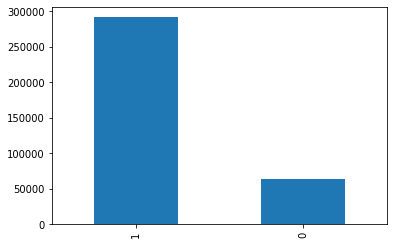

FLAG_WORK_PHONE


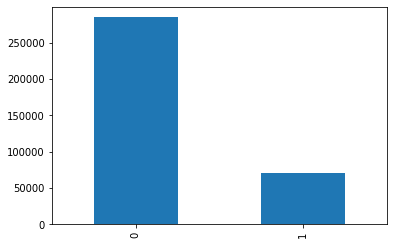

FLAG_PHONE


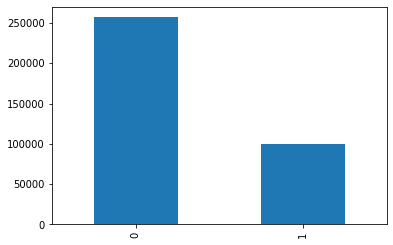

FLAG_EMAIL


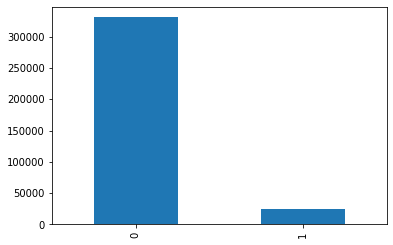

REGION_RATING_CLIENT


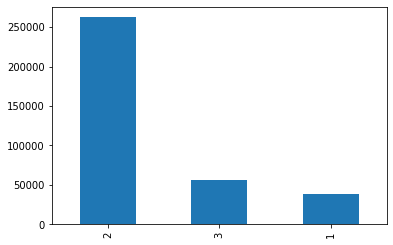

REGION_RATING_CLIENT_W_CITY


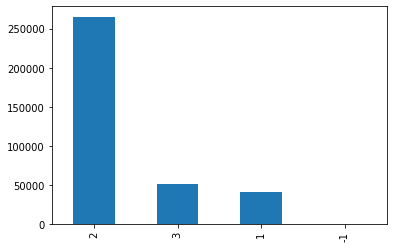

HOUR_APPR_PROCESS_START


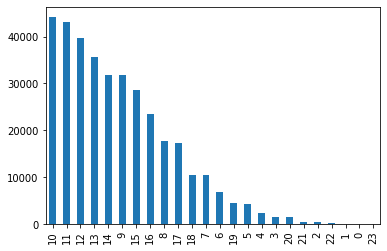

REG_REGION_NOT_WORK_REGION


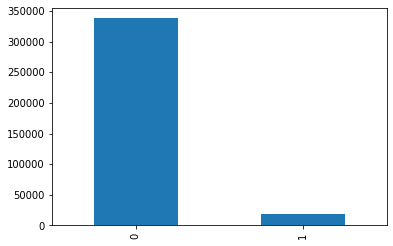

LIVE_REGION_NOT_WORK_REGION


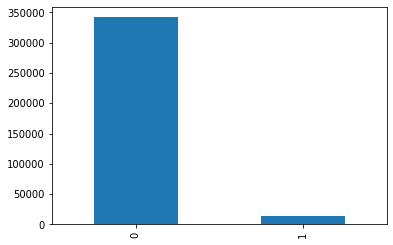

REG_CITY_NOT_LIVE_CITY


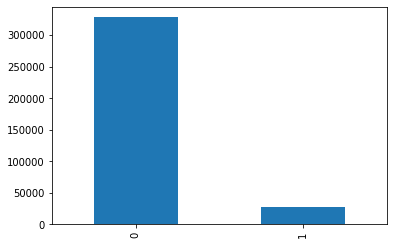

REG_CITY_NOT_WORK_CITY


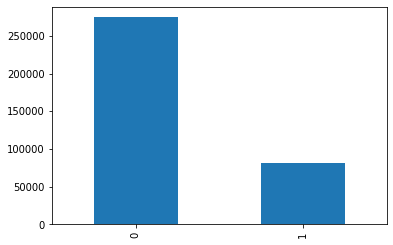

LIVE_CITY_NOT_WORK_CITY


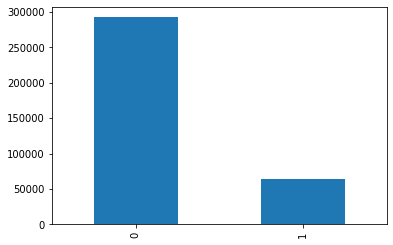

FLAG_DOCUMENT_3


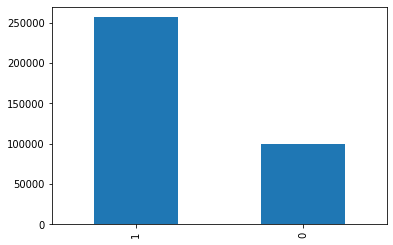

FLAG_DOCUMENT_6


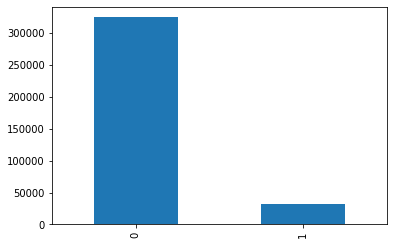

FLAG_DOCUMENT_8


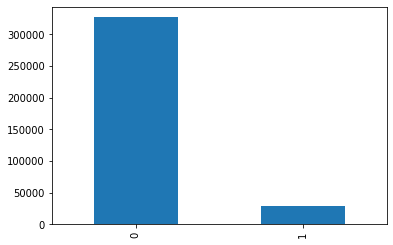

In [12]:
for i in final_features[5:]:
    print(i)
    int_table[i].value_counts().plot.bar()
    plt.show()

In [13]:
# the  REGION_RATING_CLIENT_W_CITY fields has one value with negative.  
# this appears to be an error so lets replace it with the median value.
int_table.groupby(['REGION_RATING_CLIENT_W_CITY']).size()

REGION_RATING_CLIENT_W_CITY
-1         1
 1     40342
 2    265260
 3     50652
dtype: int64

In [14]:
#replace negative value
int_table['REGION_RATING_CLIENT_W_CITY'] = int_table['REGION_RATING_CLIENT_W_CITY'].apply(lambda x: 2 if x < 0 else x)

<ipython-input-14-7a4fca812865>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_table['REGION_RATING_CLIENT_W_CITY'] = int_table['REGION_RATING_CLIENT_W_CITY'].apply(lambda x: 2 if x < 0 else x)


In [15]:
int_table.groupby(['REGION_RATING_CLIENT_W_CITY']).size()

REGION_RATING_CLIENT_W_CITY
1     40342
2    265261
3     50652
dtype: int64

## 7.4 Transform DAYS_EMPLOYED
The for some reason the DAYS_EMPLOYED field has all retired applicants as days count value of 365,243.00. I want remove the retired applicants and add them to a new categorical field.

In [16]:
#move retired applicants to categorical field and set their value to 0 in the 'DAYS_EMPLOYED' field.
int_table['RETIRED'] = int_table['DAYS_EMPLOYED'].apply(lambda x: 1 if x==365243.00 else 0)
int_table['DAYS_EMPLOYED'] = int_table['DAYS_EMPLOYED'].apply(lambda x: 0 if x==365243.00 else x)

<ipython-input-16-dcccd29fde64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_table['RETIRED'] = int_table['DAYS_EMPLOYED'].apply(lambda x: 1 if x==365243.00 else 0)
<ipython-input-16-dcccd29fde64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_table['DAYS_EMPLOYED'] = int_table['DAYS_EMPLOYED'].apply(lambda x: 0 if x==365243.00 else x)


In [17]:
int_table.head()

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET,RETIRED
0,100002,0,-9461,-637,-2120,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1.0,0
1,100003,0,-16765,-1188,-291,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0.0,0
2,100004,0,-19046,-225,-2531,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0.0,0
3,100006,0,-19005,-3039,-2437,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0
4,100007,0,-19932,-3038,-3458,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0


In [18]:
features =  ['TARGET','RETIRED'] + final_features
features

['TARGET',
 'RETIRED',
 'SK_ID_CURR',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8']

## 7.5 Save Final Features To File

In [19]:
int_table[features].to_csv(r'C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_7_applications_integer_types.csv',index=False)